<a href="https://colab.research.google.com/github/mohammadkaifi/kaifi/blob/master/DL_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
# train_data[0]

In [3]:
train_labels[0]

1

In [4]:
max([max(sequences) for sequences in train_data])

9999

In [5]:
word_index=imdb.get_word_index()
reverse_word_index=dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


In [6]:
# word_index

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np
def vectorize_sequences(sequences,dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [12]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [14]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 13s 379ms/step - loss: 0.5483 - accuracy: 0.7769 - val_loss: 0.4280 - val_accuracy: 0.8545
Epoch 2/20
30/30 [==============================] - 3s 113ms/step - loss: 0.3444 - accuracy: 0.8913 - val_loss: 0.3405 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 3s 86ms/step - loss: 0.2579 - accuracy: 0.9167 - val_loss: 0.2894 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2094 - accuracy: 0.9302 - val_loss: 0.3038 - val_accuracy: 0.8760
Epoch 5/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1783 - accuracy: 0.9422 - val_loss: 0.2821 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 3s 92ms/step - loss: 0.1533 - accuracy: 0.9508 - val_loss: 0.3218 - val_accuracy: 0.8752
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1317 - accuracy: 0.9600 - val_loss: 0.2886 - val_accuracy: 0.8872
Epoch 8/20

In [17]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']

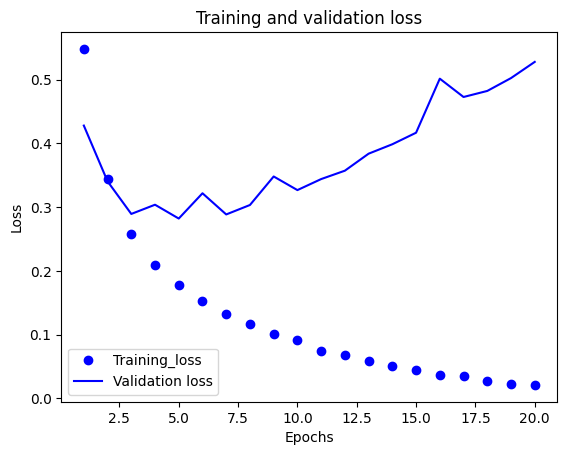

In [26]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss_values,'bo',label='Training_loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

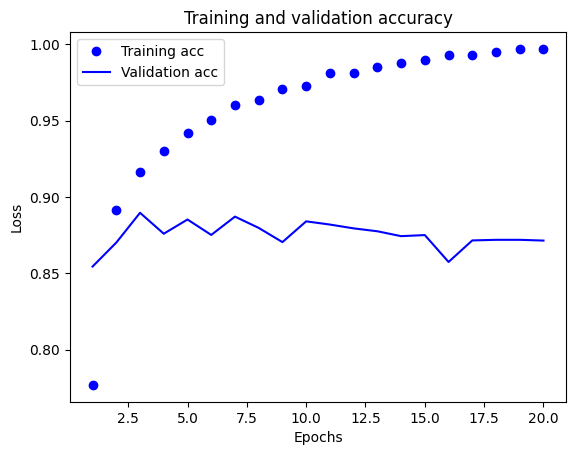

In [27]:
# plotting the training and validation accuracy
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
  model=models.Sequential()
  model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
  model.add(layers.Dense(16,activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=4,batch_size=512)
  results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 3s 47ms/step - loss: 0.4630 - accuracy: 0.8092
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2731 - accuracy: 0.9058
Epoch 3/4
49/49 [==============================] - 2s 47ms/step - loss: 0.2144 - accuracy: 0.9215
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2854 - accuracy: 0.8864


In [29]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.20066932],
       [0.998441  ],
       [0.7847595 ],
       ...,
       [0.08761426],
       [0.06825913],
       [0.49961117]], dtype=float32)